# Read a NetCDF

    -Author: Niccolò Tubini and Riccardo Rigon
    -License: Creative Commons 4.0
     

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## to convert unix time to human readable date
import time
import datetime

from netCDF4 import Dataset

In [2]:
os.getcwd()

'C:\\Users\\Niccolo\\OMS\\OMS_Project_Richards1D\\Jupyter_Notebook'

From: https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_data_set_components.html
 
_A netCDF dataset contains **dimensions**, **variables**, and **attributes**, which all have both a name and an ID number by which they are identified. These components can be used together to capture the meaning of data and relations among data fields in an array-oriented dataset. The netCDF library allows simultaneous access to multiple netCDF datasets which are identified by dataset ID numbers, in addition to ordinary file names._

- **Dimensions**
_A dimension may be used to represent a real physical dimension, for example, time, latitude, longitude, or height. A dimension might also be used to index other quantities, for example station or model-run-number. A netCDF dimension has both a name and a length._

    In the following image there are two spatial dimensions (latitude and longitude) and time. In our case we have just one spatial dimension (depth) and time.

- **Variables**
_Variables are used to store the bulk of the data in a netCDF dataset. A variable represents an array of values of the same type. A scalar value is treated as a 0-dimensional array. A variable has a name, a data type, and a shape described by its list of dimensions specified when the variable is created. A variable may also have associated attributes, which may be added, deleted or changed after the variable is created.
A position along a dimension can be specified using an index. This is an integer with a minimum value of 0 for Python_

- **Attributes**
_NetCDF attributes are used to store data about the data (ancillary data or metadata), similar in many ways to the information stored in data dictionaries and schema in conventional database systems. Most attributes provide information about a specific variable. These are identified by the name (or ID) of that variable, together with the name of the attribute.
    Some attributes provide information about the dataset as a whole and are called global attributes. These are identified by the attribute name together with a blank variable name (in CDL) or a special null "global variable" ID (in C or Fortran)._

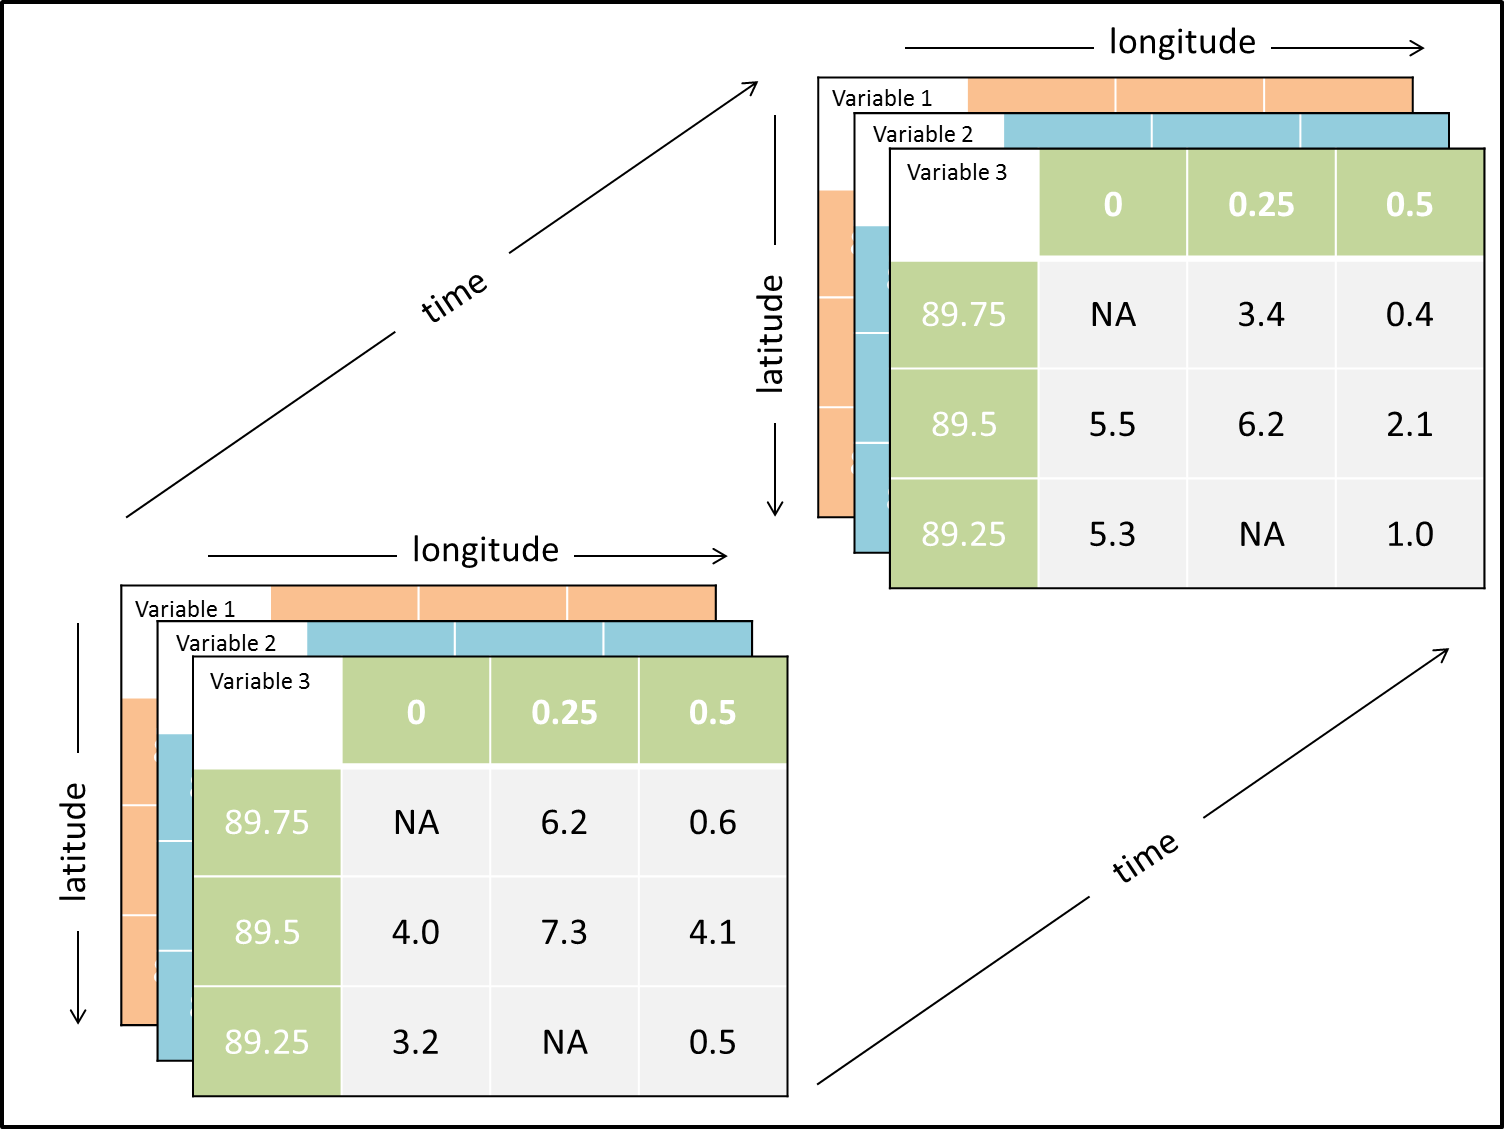

In [4]:
from IPython.display import Image
Image(filename='netcdf-file-structure.png',width=800, height=400)

Define the folder path of your outputs

`your_path/output`

In [4]:
os.chdir("../output")
os.listdir()


['Integrate PDE']

Create an object of type NetCDF using the function `Dataset`

In [6]:
ncfile = Dataset('Clay_VG.nc','r') 

It is possible to read file info simply running `print(ncfile)`


In [7]:
print('\n ***FILE INFO:\n')
print(ncfile)


 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: grid Clay_VG.nc, rain: Tr10_30min, free drainage, integration time step 300s, interface hydraulic conductivity: max 
    dimensions(sizes): depth(51), dualDepth(51), time(288)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 darcyVelocities(time,dualDepth), float64 darcyVelocitiesCapillary(time,dualDepth), float64 darcyVelocitiesGravity(time,dualDepth), float64 poreVelocities(time,dualDepth), float64 celerities(time,dualDepth), float64 kinematicRatio(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time), float64 runOff(time)
    groups: 



More informations on variables can be obtained running `ncfile.variable`. Doing so, we get:
- variable type, such as float64;
- variable unit;
- long_name of the variable describing the variable itself;
- its dimension. Usually we have unlimited dimensions since the number of time step is not assigned

In [8]:
ncfile.variables

OrderedDict([('depth', <class 'netCDF4._netCDF4.Variable'>
              float64 depth(depth)
                  units: m
                  long_name: Soil depth
              unlimited dimensions: 
              current shape = (51,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('dual_depth', <class 'netCDF4._netCDF4.Variable'>
              float64 dual_depth(dualDepth)
                  units: m
                  long_name: Dual soil depth
              unlimited dimensions: 
              current shape = (51,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: unix convention
              unlimited dimensions: time
              current shape = (288,)
              filling on, default _FillValue of -2147483647 used),
             ('psi', <class 'netCDF4._netCDF4.Variable'>
              float64 psi(t

To store values contained in a NetCDF file in a python variable we can run the following line

In [13]:
ic = ncfile.variables['psiIC']

where the argument of the method varibles is the key used in the NetCDF. This can be read from the metadata printed above.

Again, it is possible to read ic metadata just running the code below

In [14]:
print('\n ***ic INFO:\n')
print(ic)


 ***ic INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psiIC(depth)
    units: m
    long_name: Initial condition for water suction
unlimited dimensions: 
current shape = (51,)
filling on, default _FillValue of 9.969209968386869e+36 used



The variable ic is of type float64, its unit is meters, it contains the intial condition for water suction, and has 321 entries.

To get its first value run

In [15]:
ic[0]

masked_array(data=-0.32144155,
             mask=False,
       fill_value=1e+20)

In [16]:
depth = ncfile.variables['depth']
print('\n ***depht INFO:\n')
print(depth)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    units: m
    long_name: Soil depth
unlimited dimensions: 
current shape = (51,)
filling on, default _FillValue of 9.969209968386869e+36 used



It is possible to add axis labels using metadata contained in the NetCDF file.

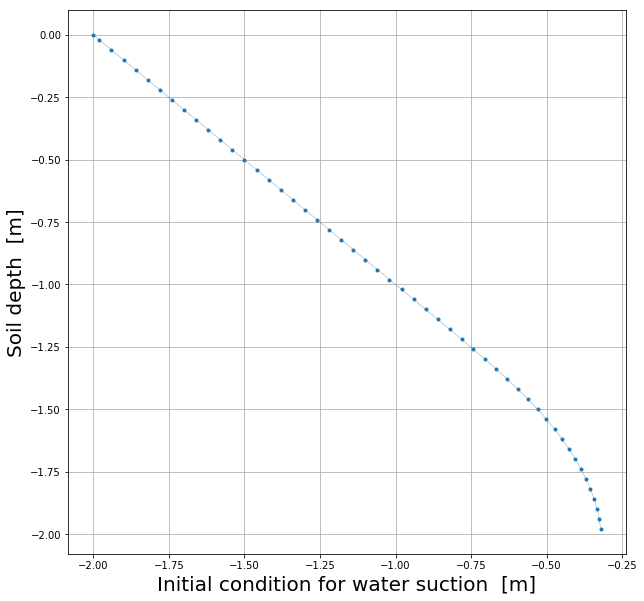

In [17]:
plt.figure(figsize=(10,10))
plt.plot(ic[:],depth[:],linewidth=0.3, marker='.')
plt.xlabel(ncfile.variables['psiIC'].long_name + '  [' +ncfile.variables['psiIC'].units +']',fontsize=20)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=20)
plt.grid()
plt.show()

Now let us consider the varible $\psi$

In [18]:
psi = ncfile.variables['psi']
print('\n ***depht INFO:\n')
print(psi)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psi(time, depth)
    units: m
    long_name: Water suction
unlimited dimensions: time
current shape = (288, 51)
filling on, default _FillValue of 9.969209968386869e+36 used



$\psi$ has both a space dimension and a time dimension: the first index identifies the time level the second one the space. 

Here we plot the water suction profile at time level 0 

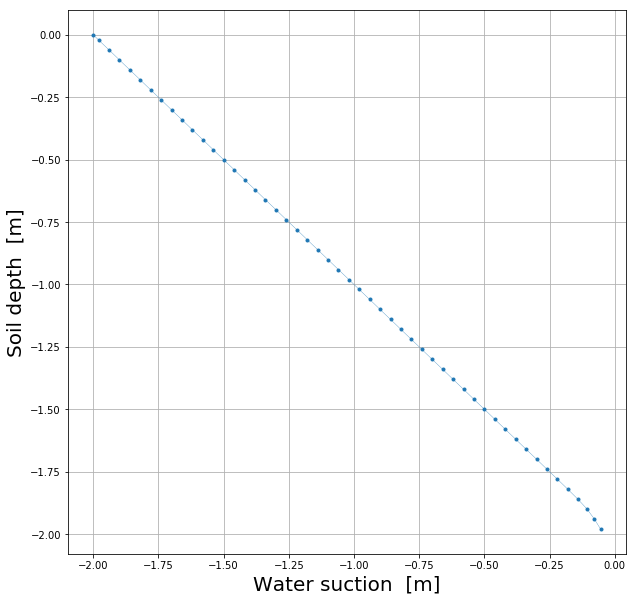

In [19]:
plt.figure(figsize=(10,10))
plt.plot(psi[0,:],depth[:],linewidth=0.3, marker='.')
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=20)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=20)
plt.grid()
plt.show()

But I might be interested to see how $\psi$ varies over time at the same depth. In this case the piece of code above modifies as follows. 

0 indicates the bottom of the domain

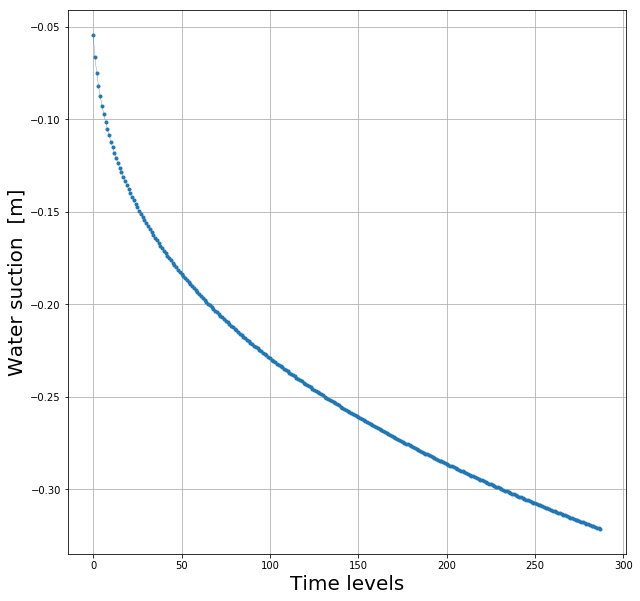

In [20]:
plt.figure(figsize=(10,10))
plt.plot(psi[:,0],linewidth=0.3, marker='.')
plt.xlabel('Time levels',fontsize=20)
plt.ylabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=20)
plt.grid()
plt.show()

To have a better plot I can create a vector of human readable dates

In [21]:
time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

# create a vector of dates
dates = [pd.Timestamp(datetime.datetime.fromtimestamp(t)) for t in time]


 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: unix convention
unlimited dimensions: time
current shape = (288,)
filling on, default _FillValue of -2147483647 used



C:\Users\Niccolo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


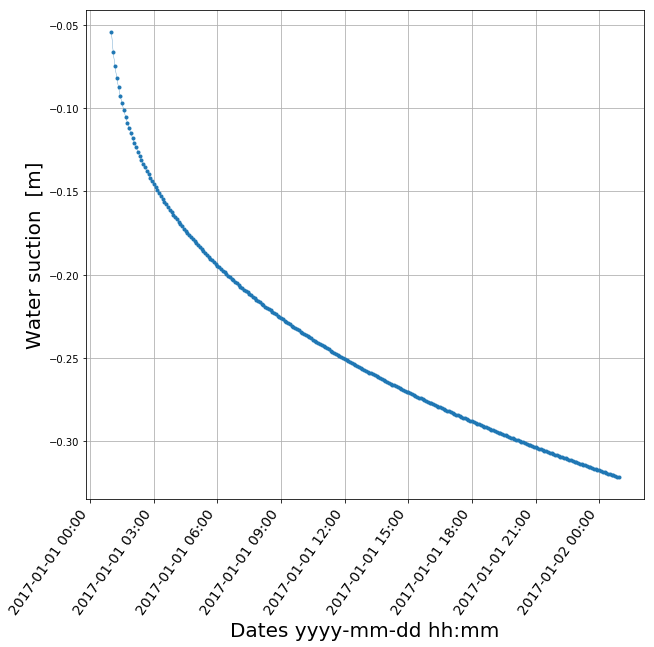

In [22]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(dates,psi[:,0],linewidth=0.3, marker='.')
plt.xlabel('Dates yyyy-mm-dd hh:mm',fontsize=20)
plt.ylabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=20)

fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(55)
    label.set_fontsize(14)
plt.grid()
plt.show()


The key _topBC_ contains the hyetograph used as top boundary condition

In [23]:
topBC = ncfile.variables['topBC']
print('\n ***TIME INFO:\n')
print(topBC)


 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 topBC(time)
    units: mm
    long_name: rainfall heights
unlimited dimensions: time
current shape = (288,)
filling on, default _FillValue of 9.969209968386869e+36 used



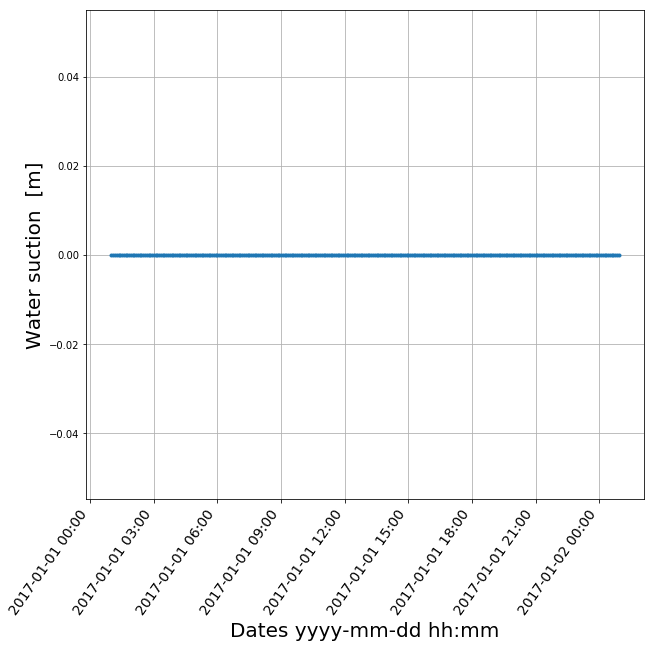

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(dates,topBC,linewidth=0.3, marker='.')
plt.xlabel('Dates yyyy-mm-dd hh:mm',fontsize=20)
plt.ylabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=20)

fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(55)
    label.set_fontsize(14)
plt.grid()
plt.show()

**Remember to close the file**

In [25]:
ncfile.close()